In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
file_path = "/content/sample_data/Heart_disease_cleveland_new.csv"
df = pd.read_csv(file_path)

df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


# EDA

In [3]:
df.info()
print("Shape:", df.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
Shape: (303, 14)


In [4]:
df.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,2.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,0.600660,0.663366,1.831683,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,0.956705,0.499120
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


target
0    164
1    139
Name: count, dtype: int64
target
0    0.541254
1    0.458746
Name: proportion, dtype: float64


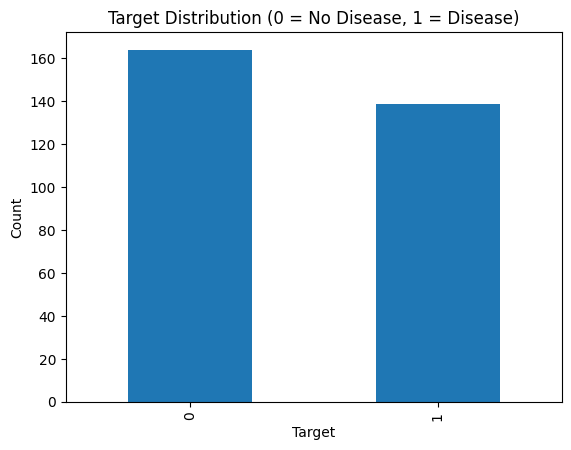

In [5]:
print(df['target'].value_counts())
print(df['target'].value_counts(normalize=True))

df['target'].value_counts().plot(kind='bar')
plt.title("Target Distribution (0 = No Disease, 1 = Disease)")
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()


- The dataset is fairly balanced:
  - 54% patients with no heart disease (target=0).
  - 46% patients with heart disease (target=1).
- This is good for modeling since there is no severe class imbalance.


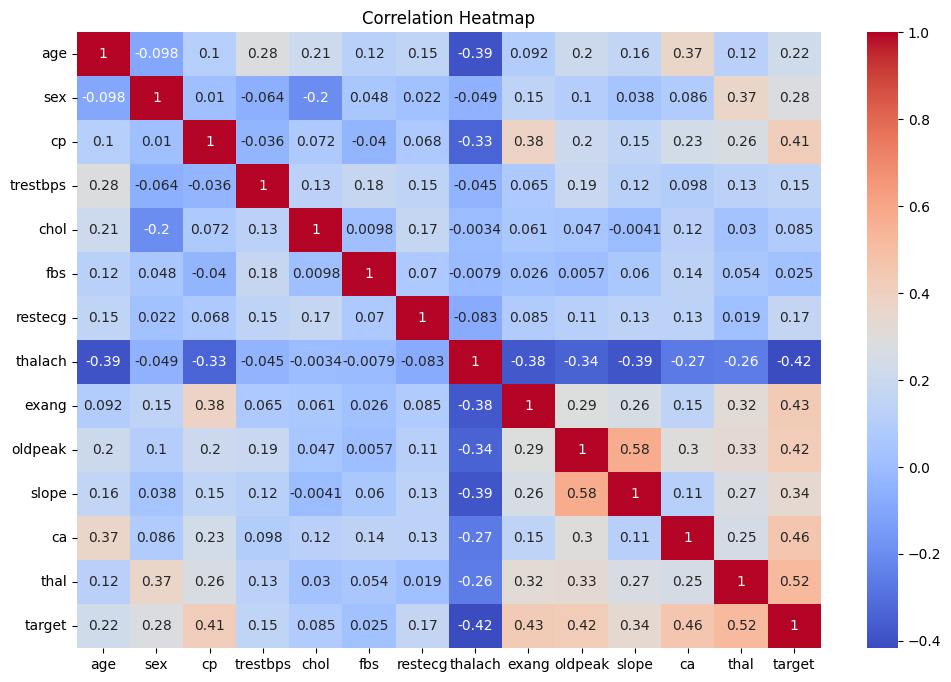

In [7]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


- "cp" (chest pain type) shows a strong negative correlation with target (-0.43).
- "thalach" (max heart rate) is positively correlated with heart disease (0.42).
- "oldpeak" (ST depression) is positively correlated with disease risk (0.43).
- "sex" has some relationship with heart disease (males higher risk).
- Cholesterol and resting BP are weakly correlated with target.


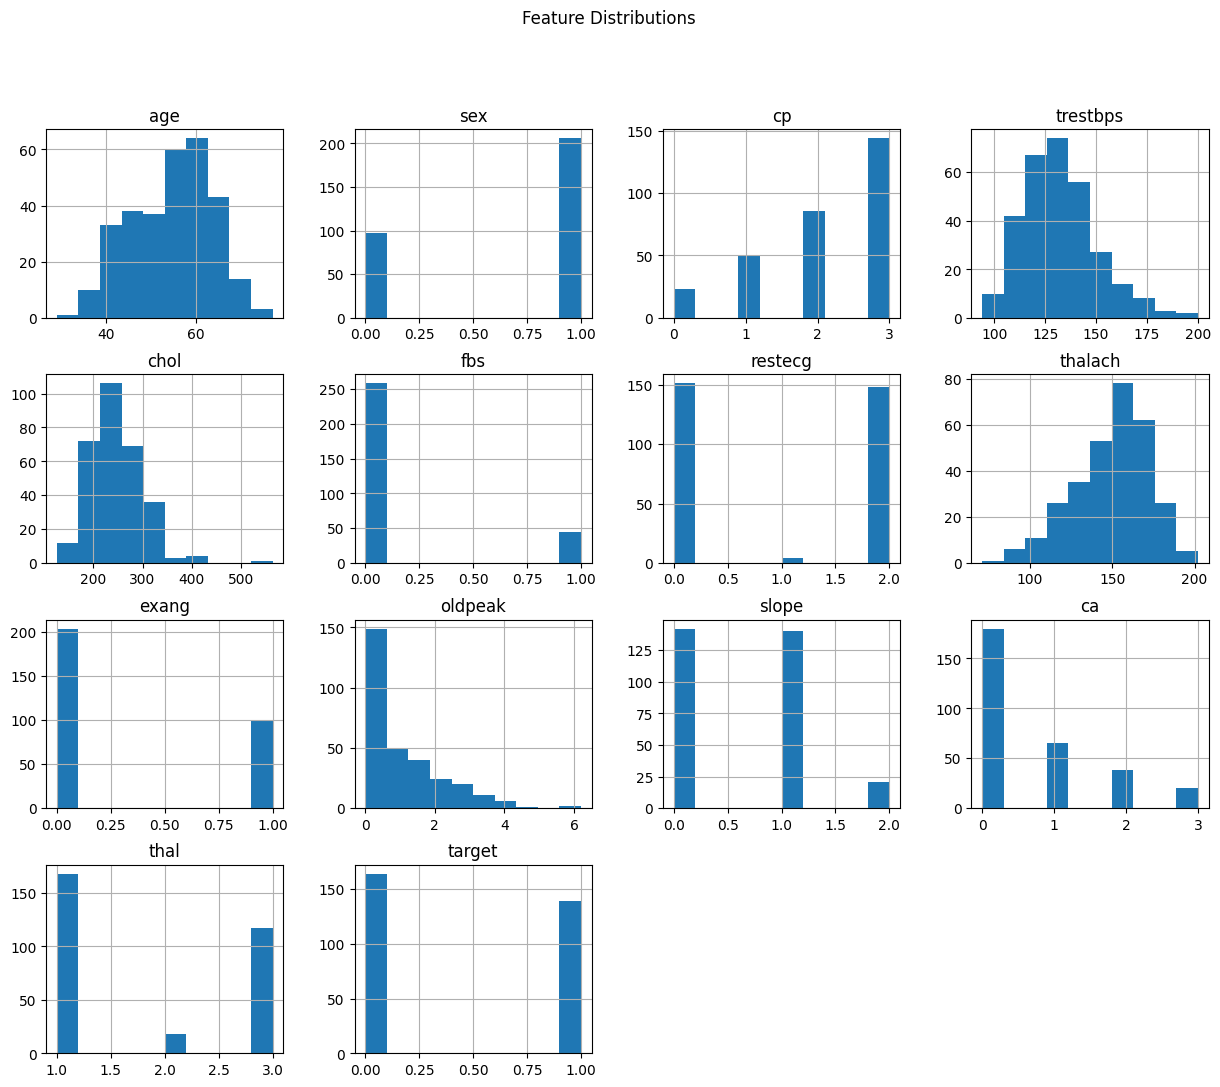

In [8]:
df.hist(figsize=(15,12))
plt.suptitle("Feature Distributions")
plt.show()


- Age is centered around the 50s, with a tail into the 70s.
- Cholesterol has a wide spread with some high outliers (>400).
- Resting blood pressure is mostly between 120–150 mmHg.
- Max heart rate achieved (thalach) is generally lower in patients with heart disease.
- Oldpeak shows higher values in patients with heart disease.


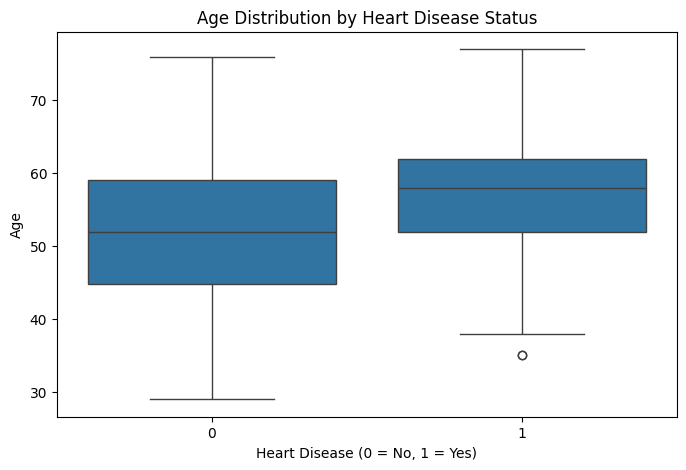

In [9]:
plt.figure(figsize=(8,5))
sns.boxplot(x="target", y="age", data=df)
plt.title("Age Distribution by Heart Disease Status")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.show()


- Patients with heart disease tend to be slightly older.
- However, there is considerable overlap between age groups.
- Age alone is not a strong discriminator but contributes when combined with other features.


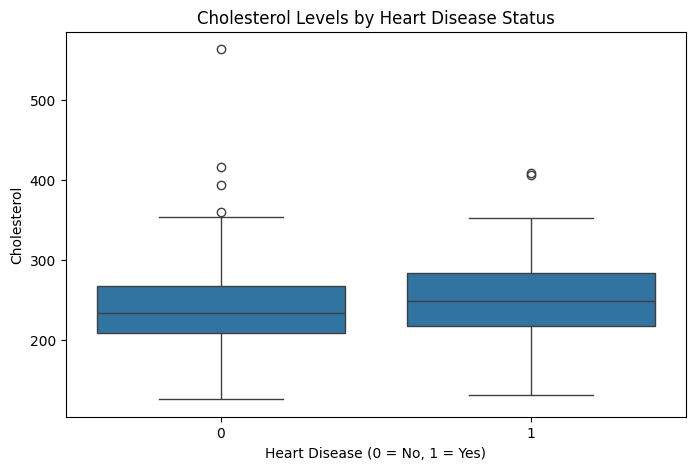

In [10]:
plt.figure(figsize=(8,5))
sns.boxplot(x="target", y="chol", data=df)
plt.title("Cholesterol Levels by Heart Disease Status")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Cholesterol")
plt.show()


- Cholesterol levels vary widely across both groups.
- No clear separation, meaning cholesterol alone is not a strong predictor.
- Some very high cholesterol outliers exist but appear in both classes.


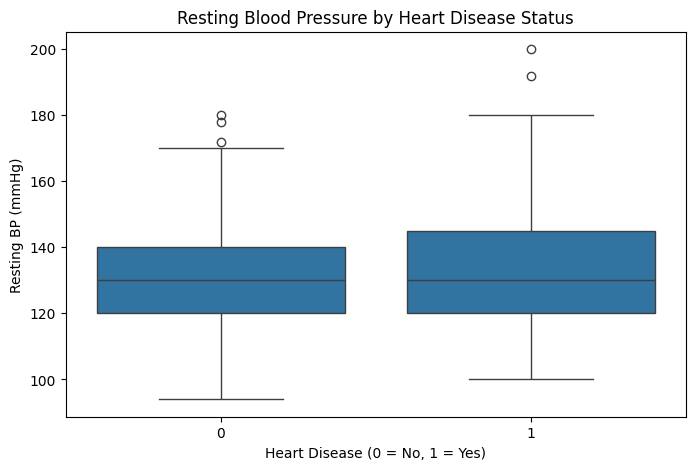

In [11]:
plt.figure(figsize=(8,5))
sns.boxplot(x="target", y="trestbps", data=df)
plt.title("Resting Blood Pressure by Heart Disease Status")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Resting BP (mmHg)")
plt.show()


- Resting BP distributions for diseased and non-diseased patients overlap heavily.
- Resting BP is not a strong indicator of heart disease in this dataset.


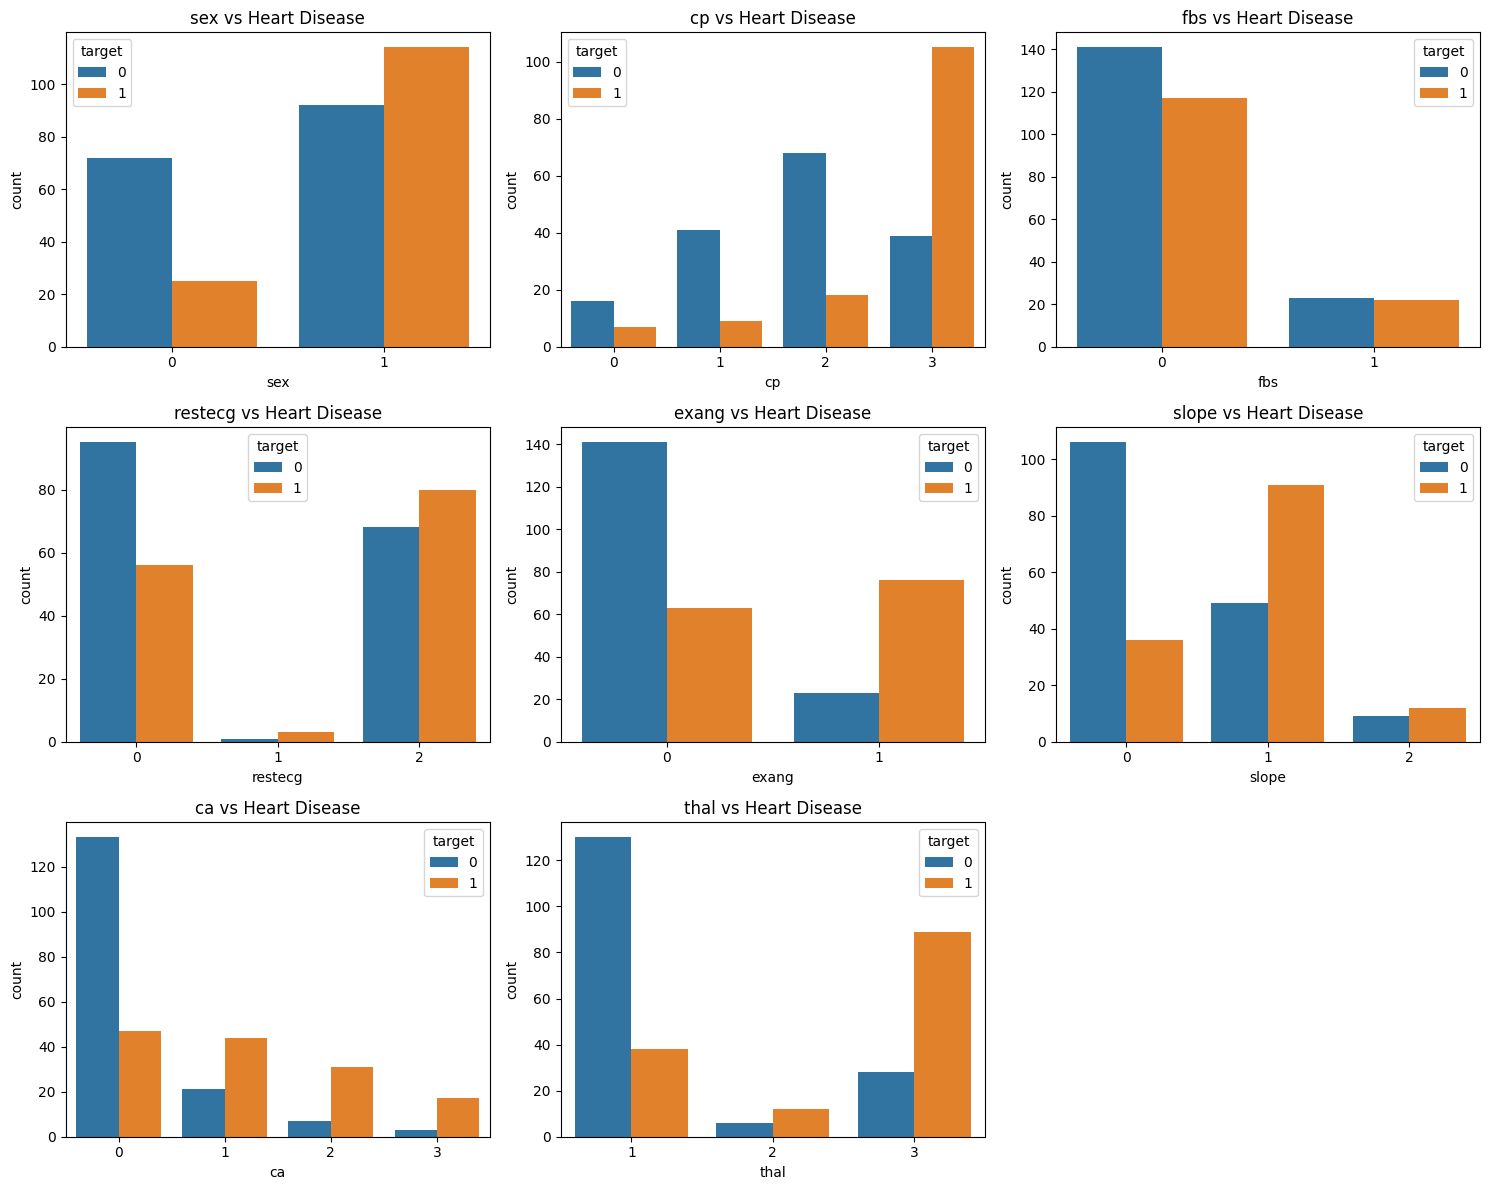

In [12]:
categorical_cols = ['sex','cp','fbs','restecg','exang','slope','ca','thal']

plt.figure(figsize=(15,12))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3,3,i)
    sns.countplot(x=col, hue="target", data=df)
    plt.title(f"{col} vs Heart Disease")
plt.tight_layout()
plt.show()


- Sex: Males (sex=1) are more likely to have heart disease than females.
- Chest Pain (cp): Certain chest pain types are strongly associated with heart disease.
- Fasting Blood Sugar (fbs): Has little discriminative power in this dataset.
- Restecg (ECG results): Some variation but not a strong predictor.
- Exercise Induced Angina (exang): More common in patients with heart disease.
- Slope, ca, thal: Show visible patterns separating patients with and without heart disease.


**EDA Summary**

- The dataset is balanced: ~54% no heart disease, ~46% heart disease.
- Strongest feature relationships with heart disease:
  - Chest pain type (cp)
  - Maximum heart rate achieved (thalach)
  - ST depression (oldpeak)
  - Number of major vessels (ca)
  - Thalassemia (thal)
- Age, sex, and exercise-induced angina also show moderate patterns.
- Cholesterol and resting blood pressure, while clinically important, are weak predictors in this dataset.
- Overall, the dataset contains both strong predictors (cp, thalach, oldpeak, ca, thal) and weak predictors (chol, trestbps, fbs).
- These insights will guide **feature engineering** and **model building**.


# Feature Engineering

In [13]:
# Create age groups
df['age_group'] = pd.cut(
    df['age'],
    bins=[0, 40, 55, 70, 100],
    labels=['Young (<40)', 'Middle-aged (40-55)', 'Senior (55-70)', 'Elderly (70+)']
)

df[['age','age_group']].head(10)


,age,age_group
0,63,Senior (55-70)
1,67,Senior (55-70)
2,67,Senior (55-70)
3,37,Young (<40)
4,41,Middle-aged (40-55)
5,56,Senior (55-70)
6,62,Senior (55-70)
7,57,Senior (55-70)
8,63,Senior (55-70)
9,53,Middle-aged (40-55)


In [14]:
# Based on American Heart Association BP categories
def bp_category(bp):
    if bp < 120:
        return 'Normal'
    elif 120 <= bp < 130:
        return 'Elevated'
    elif 130 <= bp < 140:
        return 'High BP (Stage 1)'
    elif 140 <= bp < 180:
        return 'High BP (Stage 2)'
    else:
        return 'Hypertensive Crisis'

df['bp_category'] = df['trestbps'].apply(bp_category)
df[['trestbps','bp_category']].head(10)


,trestbps,bp_category
0,145,High BP (Stage 2)
1,160,High BP (Stage 2)
2,120,Elevated
3,130,High BP (Stage 1)
4,130,High BP (Stage 1)
5,120,Elevated
6,140,High BP (Stage 2)
7,120,Elevated
8,130,High BP (Stage 1)
9,140,High BP (Stage 2)


In [15]:
# Cholesterol risk flag
df['high_cholesterol'] = (df['chol'] > 240).astype(int)

# High fasting blood sugar flag
df['high_fbs'] = (df['fbs'] == 1).astype(int)


df[['chol','high_cholesterol','fbs','high_fbs']].head(10)


,chol,high_cholesterol,fbs,high_fbs
0,233,0,1,1
1,286,1,0,0
2,229,0,0,0
3,250,1,0,0
4,204,0,0,0
5,236,0,0,0
6,268,1,0,0
7,354,1,0,0
8,254,1,0,0
9,203,0,1,1


# Feature Selection

In [17]:
y = df['target']

feature_cols = [
    'age','sex','cp','trestbps','chol','fbs','restecg','thalach',
    'exang','oldpeak','slope','ca','thal',
    'age_group','bp_category','high_cholesterol','high_fbs'
]

X = df[feature_cols]
X.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,age_group,bp_category,high_cholesterol,high_fbs
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,Senior (55-70),High BP (Stage 2),0,1
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,Senior (55-70),High BP (Stage 2),1,0
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,Senior (55-70),Elevated,0,0
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,Young (<40),High BP (Stage 1),1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,Middle-aged (40-55),High BP (Stage 1),0,0


In [23]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()

# Encode all categorical features into numeric
categorical_cols = ['age_group','bp_category']
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Correlation with target
corr_with_target = df_encoded.corr()['target'].drop('target').sort_values(ascending=False)
corr_with_target


,target
thal,0.515894
ca,0.460033
exang,0.431894
oldpeak,0.424510
cp,0.414446
slope,0.339213
sex,0.276816
age,0.223120
age_group,0.201232
restecg,0.169202


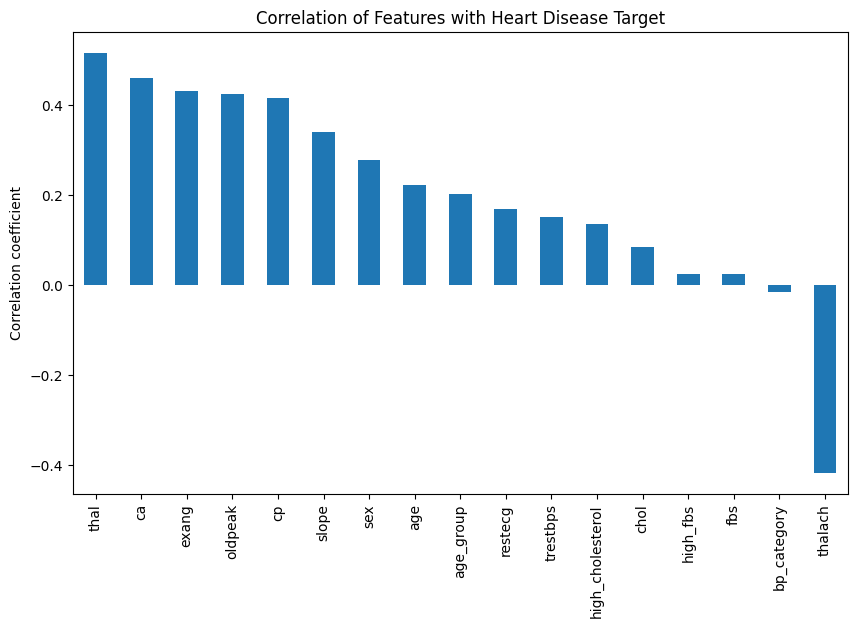

In [24]:
# Correlation values (from encoded dataset)
corr_with_target = df_encoded.corr()['target'].drop('target').sort_values(ascending=False)

plt.figure(figsize=(10,6))
corr_with_target.plot(kind='bar')
plt.title("Correlation of Features with Heart Disease Target")
plt.ylabel("Correlation coefficient")
plt.show()


In [26]:
# Select final features
selected_features = [
    'thal','ca','exang','oldpeak','cp',
    'slope','sex','age','thalach','restecg',
    'trestbps'
]

# Create new dataframe with selected features + target
df_selected = df[selected_features + ['target']]

df_selected.to_csv("Heart_disease_cleveland_selected.csv", index=False)

from google.colab import files
files.download("Heart_disease_cleveland_selected.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

- The dataset was analyzed with comprehensive EDA.
- Strong predictors of heart disease were identified:
  - thal, ca, exang, oldpeak, cp, slope, sex, age, thalach, restecg
- Weaker but clinically relevant predictors (trestbps, chol, high_cholesterol) were also retained.
- Very weak features (fbs, bp_category) were dropped due to minimal correlation with the target.
- A new dataset was created containing only the selected features and the target variable.
- This reduced dataset is now ready for:
  - Further preprocessing (encoding, scaling).
  - Building and evaluating predictive machine learning models.
- The feature selection balances statistical evidence with medical relevance, ensuring both accuracy and interpretability in future models.
